In [1]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'sans-serif'

# Week 1 & 2

In [3]:
df_feat_com = pd.read_csv("../data/features/stoich120_fingerprints.csv")
#df_feat_ofm = pd.read_csv("../data/features/ofm_fingerprints.csv")
df_label = pd.read_csv("../data/qmof.csv")

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_51707/2780969865.py:3: DtypeWarning: Columns (42,43,45,46,47,48,49,51,52,53,54,55,57,58,59,67,68,69,70,71,79,80,81,82,83,91,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_label = pd.read_csv("../data/qmof.csv")


## Discussion 1

- How many structures are there in the database?
- What is the dimension of the feature vectores?

Hint: call `df.shape`

In [4]:
#fillme
df_feat_com.shape

(20374, 121)

## Discussion 2

- Are there any features that have the same values for all structures? If yes, which are they?
- What kind of effects will they have on the model performance?

In [16]:
#fillme
com_counting = df_feat_com.describe()
const_feat = [key for key in com_counting.keys() if com_counting[key]["std"]==0]

In [17]:
const_feat

['He fraction',
 'Ne fraction',
 'Ar fraction',
 'Kr fraction',
 'Xe fraction',
 'Pm fraction',
 'Ta fraction',
 'Os fraction',
 'Po fraction',
 'At fraction',
 'Rn fraction',
 'Fr fraction',
 'Ra fraction',
 'Ac fraction',
 'Pa fraction',
 'Am fraction',
 'Cm fraction',
 'Bk fraction',
 'Cf fraction',
 'Es fraction',
 'Fm fraction',
 'Md fraction',
 'No fraction',
 'Lr fraction']

In [20]:
uni_feat = [key for key in df_feat_com.keys() if key not in const_feat]

In [21]:
df_feat_com_uni = df_feat_com[uni_feat]

In [25]:
df_feat_com_uni.to_csv("../data/features/stoich120_fingerprints_processed.csv", index=False)

- Model with original fingerprints \
Train size:  16299 \
Test size:  4075 \
Train/test MAE:  0.3820170159136949 0.4528077329818929 \
Train/test MSE:  0.2592329547360367 0.3575536280128822 \
Train/test r2:  0.7984888749541184 0.7152858603480199 \

- Model remove part of features \
Train size:  16299 \
Test size:  4075 \
Train/test MAE:  0.38201701591369436 0.4528077329819106 \
Train/test MSE:  0.25923295473605484 0.3575536280128981 \
Train/test r2:  0.7984888749541043 0.7152858603480073 \

## Check the distribution of band gaps

Hint: `df.describe()`

In [27]:
#fillme
df_label["outputs.pbe.bandgap"].describe()

count    20374.000000
mean         2.087297
std          1.131570
min          0.000131
25%          1.088199
50%          2.143079
75%          2.887385
max          6.445777
Name: outputs.pbe.bandgap, dtype: float64

In [32]:
q = df_label["outputs.pbe.bandgap"].quantile(0.75)

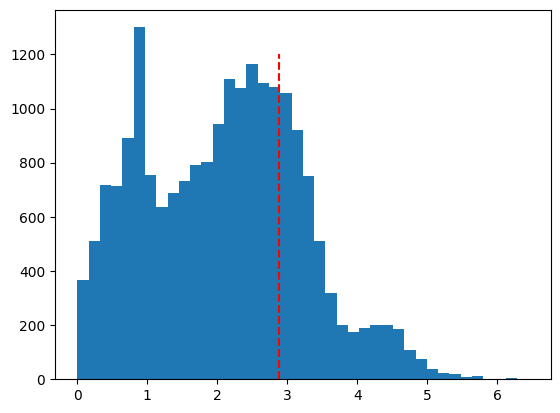

In [33]:
plt.hist(df_label["outputs.pbe.bandgap"], bins=40)
plt.plot([q, q], [0, 1200], 'r--')

# Week 3

## Read true and predicted bandgap

In [34]:
#fillme
df_train = pd.read_csv("../results/stoich120/train_results.csv")
df_test = pd.read_csv("../results/stoich120/test_results.csv")

In [39]:
train_min = df_train["ML"].min()
train_max = df_train["ML"].max()

test_min = df_test["ML"].min()
test_max = df_test["ML"].max()

## Plot the parity plot

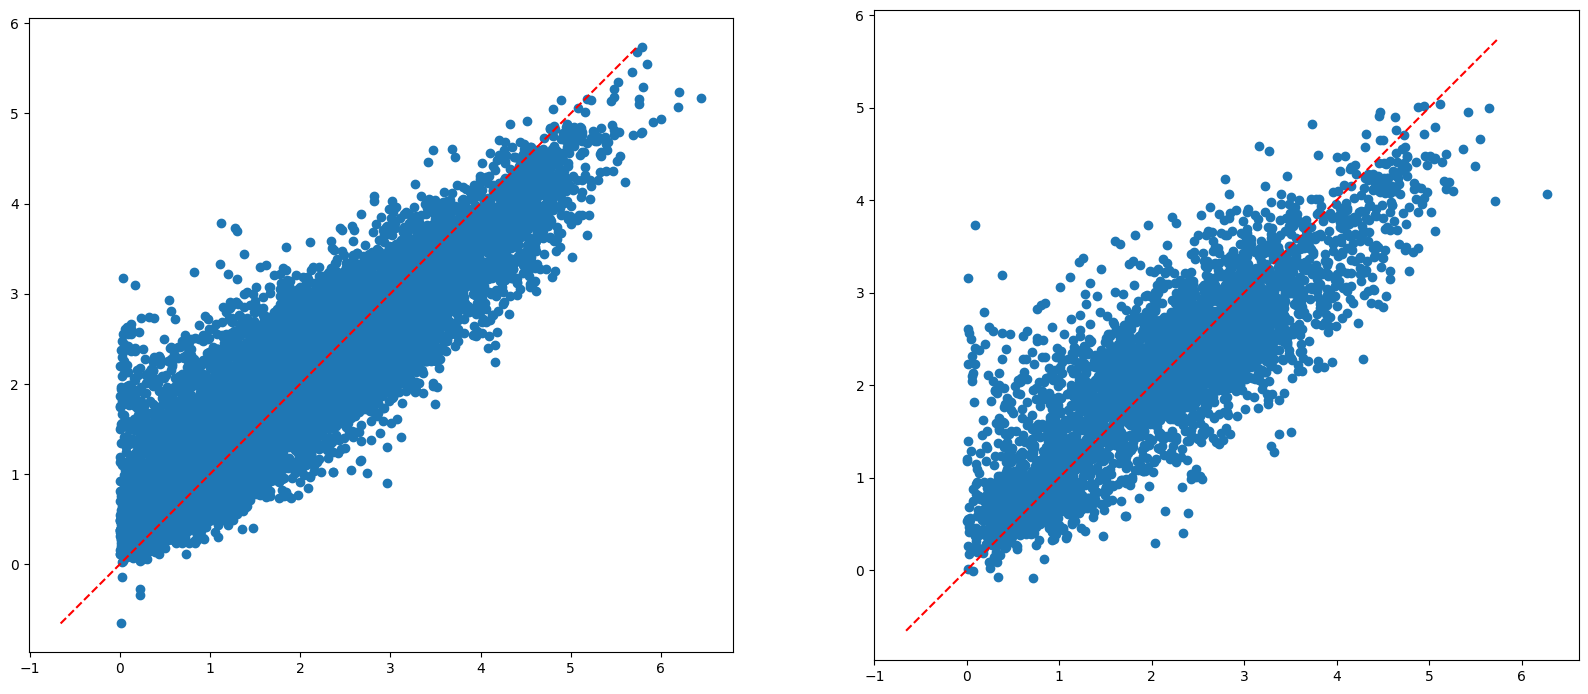

In [49]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches((20,9))

for ax in axs:
    ax.set_aspect('equal')
axs[0].scatter(df_train["DFT"], df_train["ML"])
axs[0].plot([train_min, train_max], [train_min, train_max], 'r--')

axs[1].scatter(df_test["DFT"], df_test["ML"])
axs[1].plot([train_min, train_max], [train_min, train_max], 'r--')

#fig.savefig('#fillme')

# Week 4

## Discussion

- What is your hyperparameter searching range? 
- What is the best hyperparameter you found?

In [ ]:
m1_loss = #fillme df.read("../results/stoich120/loss_ft.csv") # Saving loss to csv need to be added in w4-finetune
m2_loss = #fillme df.read("../results/ofm/loss_ft.csv")

In [ ]:
plt.bar(#fillme)

# Week 5

## Plot the learning curve

In [ ]:
# read data

lc_data = #fillme

In [ ]:
# make plots

plt.plot(#fillme)
plt.errorbar(#fillme)

## Use the model to predict band gap of MOF-5

Follow the steps:
All files of MOF-5 needed is in ../data/mof5s

- Featurize MOF-5 with python scripts in ../machine_learning/w1w2-featurizer
- Load saved model
- Predict the band gap of MOF-5
- Compare the model estimated band gap with DFT calculated value

In [ ]:
#fillme